# Lab 5 : Clustering Part 2

In [14]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib

#DBSCAN Algorithm

DBSCAN(Density-Based Spatial Clustering of Applications with Noise) is a commonly used unsupervised clustering algorithm. DBSCAN does not need to specify the number of clusters. It can automatically detect the number of clusters based on your input data and parameters. More importantly, DBSCAN can find arbitrary shape clusters that k-means are not able to find.

# Algorithm:
a. The algorithm proceeds by arbitrarily picking up a point in the dataset (until all points have been visited).

b. If there are at least ‘minPoint’ points within a radius of ‘ε’ to the point then we consider all these points to be part of the same cluster.

c. The clusters are then expanded by recursively repeating the neighborhood calculation for each neighboring point



A. **Generate "N" spherical training data points.**


/tmp/ipykernel_2632/673490628.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_2632/673490628.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



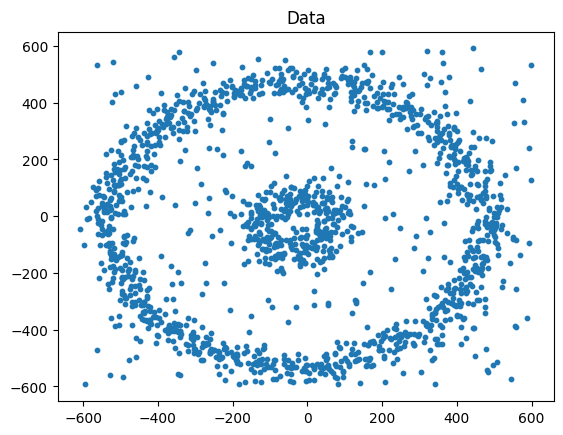

In [15]:
def Circle(r,n):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

df=pd.DataFrame(Circle(500,1000))
df=df.append(Circle(100,300))
df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])

plt.scatter(df[0],df[1],s=10)
plt.title('Data')
plt.show()

B. **Perform DBSCAN Algorithm on the above generated data to obtain clusters**

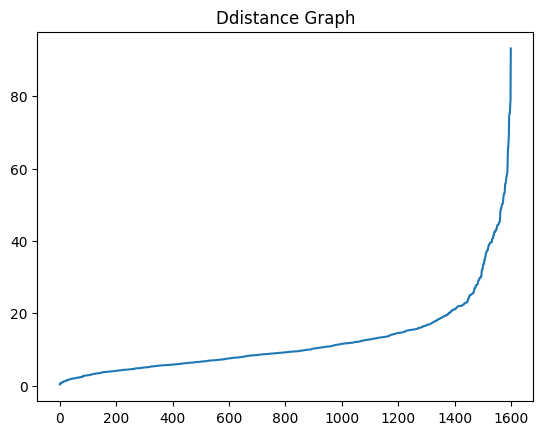

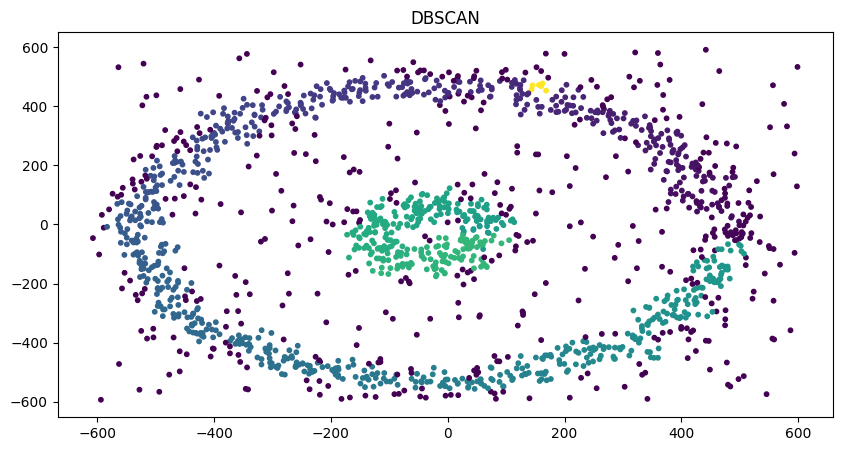

In [16]:
#DBSCAN Algorithm
eps = 30
m_p = 6
x = np.array(df)
#D = x

def update_labels(X,pt,eps,labels,cluster_val):
    neighbors = []
    label_index = []
    for i in range(X.shape[0]):
        if np.linalg.norm(X[pt]-X[i])<eps:
            neighbors.append(X[i])
            label_index.append(i)
    if len(neighbors) <m_p:
        for i in range(len(labels)):
            if i in label_index:
                labels[i]=-1
    else:
        for i in range(len(labels)):
            if i in label_index:
                labels[i]=cluster_val
    return labels

labels = [0]*x.shape[0]
C = 1
for p in range(x.shape[0]):
    if labels[p]==0:
        labels = update_labels(x,p,eps,labels,C)
        C= C+1


from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[[0,1]])
distances, indices = nbrs.kneighbors(df[[0,1]])
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('Ddistance Graph')

plt.show()

plt.subplots(figsize=(10,5))
plt.scatter(x[:,0],x[:,1],c=labels,s=10);
plt.title("DBSCAN")
plt.show()

C. **Experiment by varying the number of min points and epsilon radius and plot your observations**

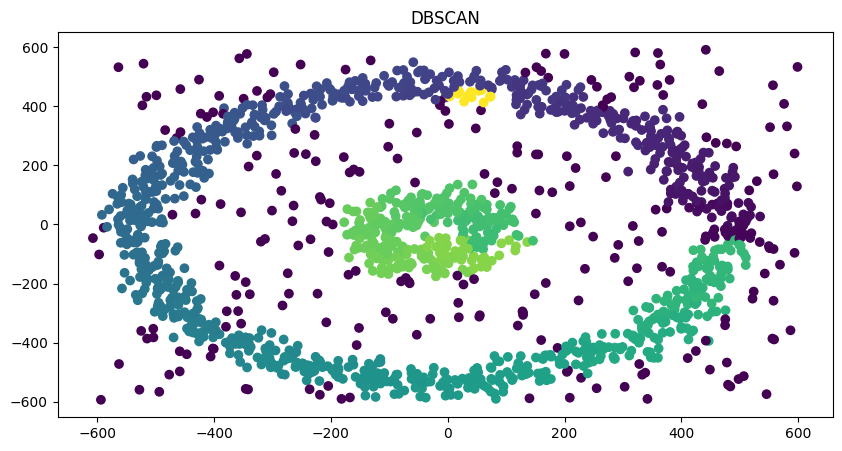

In [17]:
eps = 40
m_p = 5
x = np.array(df)

def update_labels(X,pt,eps,labels,cluster_val):
    neighbors = []
    label_index = []
    for i in range(X.shape[0]):
        if np.linalg.norm(X[pt]-X[i])<eps:
            neighbors.append(X[i])
            label_index.append(i)
    if len(neighbors) <m_p:
        for i in range(len(labels)):
            if i in label_index:
                labels[i]=-1
    else:
        for i in range(len(labels)):
            if i in label_index:
                labels[i]=cluster_val
    return labels

labels = [0]*x.shape[0]
C = 1

for p in range(x.shape[0]):
    if labels[p]==0:
        labels = update_labels(x,p,eps,labels,C)
        C= C+1

plt.subplots(figsize=(10,5))
plt.scatter(x[:,0],x[:,1], c=labels);
plt.title("DBSCAN")
plt.show()

D. **Compare your model with the built in DBSCAN in Sci-kit Learn. Also compare you results with GMM and the K-means Algorithm**

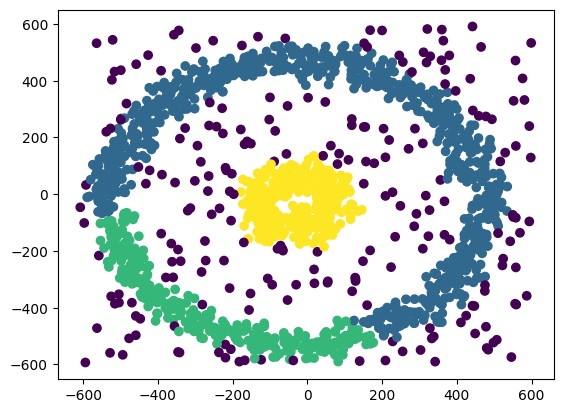

In [18]:
data = np.array(df)
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 30,min_samples=5).fit(data)
labels = dbscan.labels_
plt.scatter(data[:, 0], data[:, 1], c=labels)

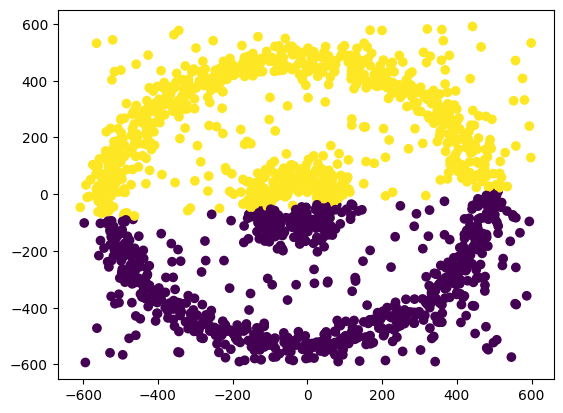

In [19]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2).fit(data)
labels = gm.predict(data)
plt.scatter(data[:, 0], data[:, 1], c=labels)


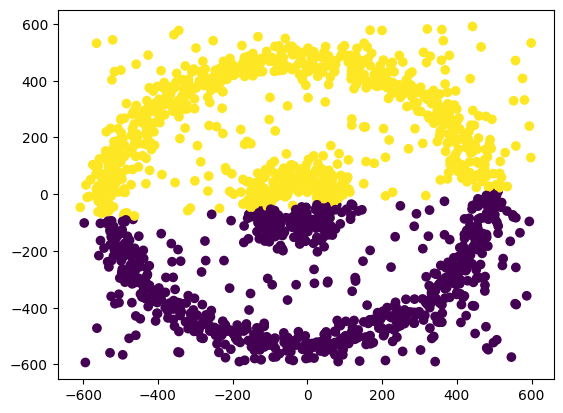

In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit(data**2)
y = kmeans.fit_predict(data)
lbl = kmeans.predict(data)
plt.scatter(data[:,0],data[:,1],c=labels)


# **Fuzzy C-Means Based clustering**

1. Randomly initialize the centroids and clusters K, and compute the probability that each data point xi is a member of a given cluster k, P(point xi has label k|xi, k).

2. Iteration: Recalculate the centroids of the clusters as the weighted centroid given the probabilities of membership of all data points xi:

$$
\mu_k(n+1)=\frac{\sum_{x_i \in k} x_i * P\left(\mu_k \mid x_i\right)^b}{\sum_{x_i \in k} P\left(\mu_k \mid x_i\right)^b}
$$


3. Implement it on the data for which Kmeans was implemented. 

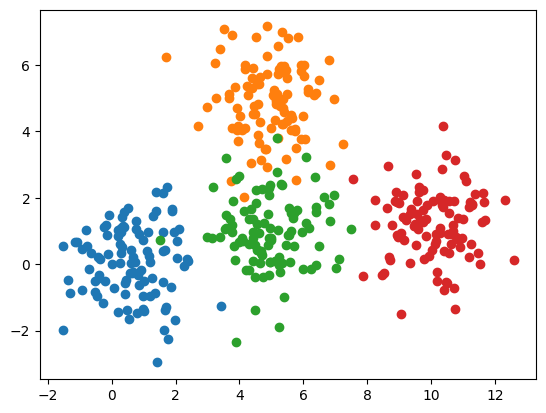

In [31]:
import matplotlib.pyplot as plt
mean_1 = np.array([0.5,0])
mean_2 = np.array([5,5])
mean_3 = np.array([5,1])
mean_4 = np.array([10,1.5])

Sigma  = np.array([[1,0],[0,1]])
distribution_1     = np.random.multivariate_normal(mean_1,Sigma,100)
distribution_2     = np.random.multivariate_normal(mean_2,Sigma,100)
distribution_3     = np.random.multivariate_normal(mean_3,Sigma,100)
distribution_4     = np.random.multivariate_normal(mean_4,Sigma,100)
Distribution       = np.concatenate((distribution_1,distribution_2,distribution_3,distribution_4))

plt.figure()

plt.scatter(distribution_1[:,0], distribution_1[:,1])
plt.scatter(distribution_2[:,0], distribution_2[:,1])
plt.scatter(distribution_3[:,0], distribution_3[:,1])
plt.scatter(distribution_4[:,0], distribution_4[:,1])

final clustering


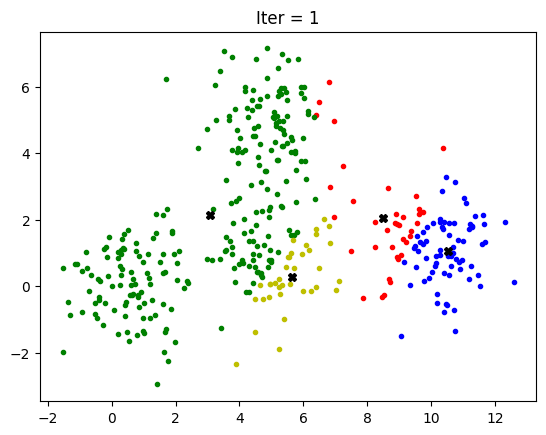

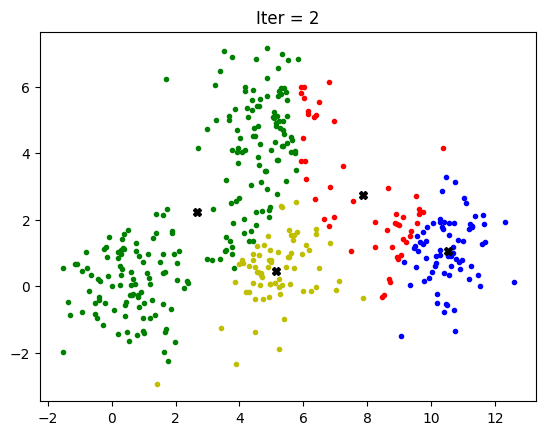

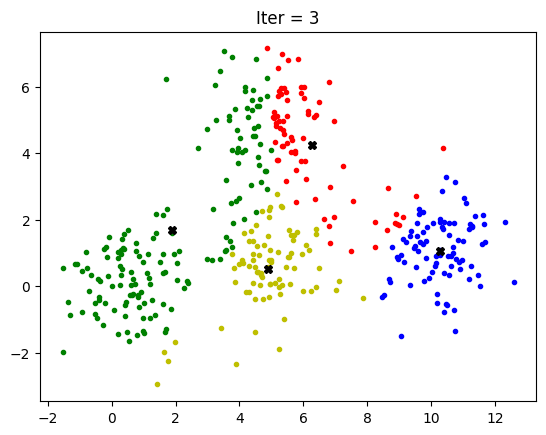

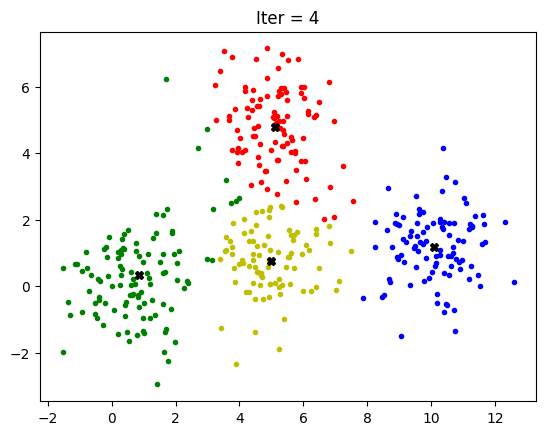

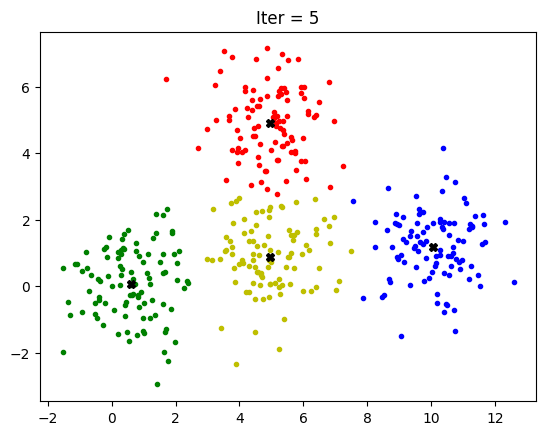

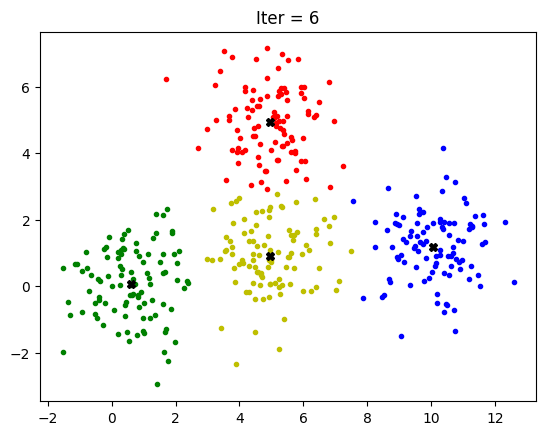

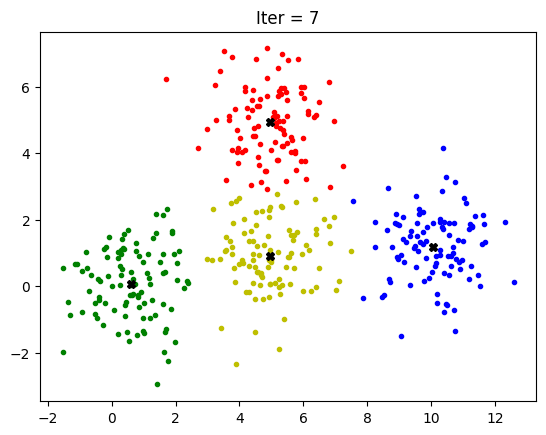

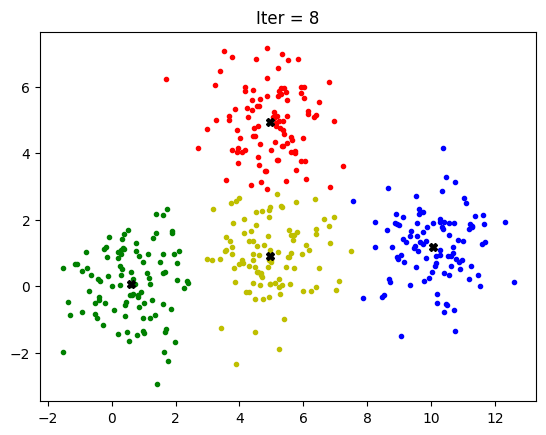

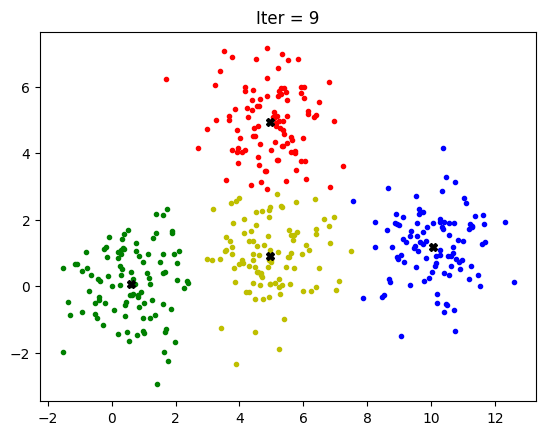

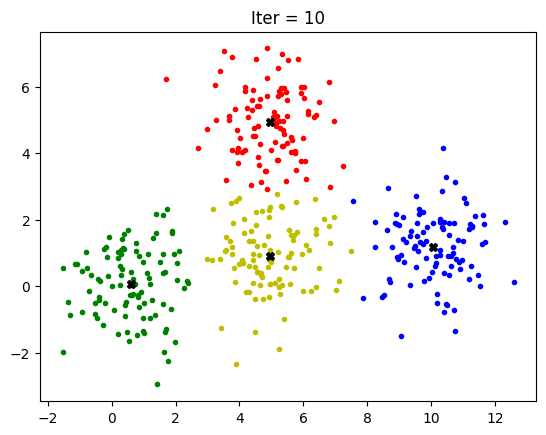

In [33]:
Iterations = 100
FV_tuple = np.zeros((Distribution.shape[0], 6))
rands = np.random.randint(0, Distribution.shape[0], 4)
Centroids = Distribution[rands,:]
colour=['r','g','b','y','k','m','c']
K = 4
class FuzzyC:
    def __init__(self,c,data):
        self.n_centers = c
        self.data = data
        self.distance_matrix = []
    
    def doFCM(self):
        for o in range(10):

            for i in range(Distribution.shape[0]):
                for j in range(K):
                    FV_tuple[i,j] = np.linalg.norm(Distribution[i,:] - Centroids[j,:])
                    self.distance_matrix.append(FV_tuple[i,:K])

                distance = np.min(FV_tuple[i,:K])
                index    = int((np.where(distance==FV_tuple[i,:K])[0]))
                FV_tuple[i,K] = index
                FV_tuple[i,K+1] = distance 

            for i in range(K):
                index = np.where(FV_tuple[:,K]==i)
                Centroids[i,:] = np.mean(Distribution[index,:][0],axis=0)
    
        

            plt.figure()

            for _ in range(K):
                ind = np.where(FV_tuple[:,K]==_)
                plt.plot(Distribution[ind,0],Distribution[ind,1],'.', color=colour[_] )

    
            plt.plot(Centroids[:,0], Centroids[:,1], 'X', color='k')
            plt.title(f"Iter = {o + 1}")  

data = Distribution 
fcm = FuzzyC(4, data)
fcm.doFCM()
print("final clustering")

# Hierarchical Clustering

Hierarchical clustering is an unsupervised clustering technique which groups together the unlabelled data of similar characteristics.

There are two types of hierarchical clustering:


*   Agglomerative Clustering
*   Divisive Clustering

**Agglomerative Clustering:** 

 In this type of hierarchical clustering all data set are considered as indivisual cluster and at every iterations clusters with similar characteristics are merged to give bigger clusters. This is repeated untill one single cluster is reached. It is also called bottem-top approach.



## Agglomerative Clustering:

Lets start with some dummy example :

X=$[x_1,x_2,...,x_5]$, with

$x_1=\begin{bmatrix} 1\\1\end{bmatrix}$, $x_2=\begin{bmatrix} 2\\1\end{bmatrix}$, $x_3=\begin{bmatrix} 5\\4\end{bmatrix}$, $x_4=\begin{bmatrix} 6\\5\end{bmatrix}$, $x_5=\begin{bmatrix} 6.5\\6\end{bmatrix}$

**Steps to perform Agglomerative Clustering:**





1.   Compute Distance matrix ($N \times N$ matrix, where $N$ number of vectors present in the dataset):
$D(a,b)=||x_{a}-x_{b}||_{2}$
2.   Replace the diagonal elements with $inf$ and find the index of the minimum element present in the distance matrix (suppose we get the location $(l,k)$).
3. Replace $x_{min(l,k)}=.5\times[x_{l}+x_{m}]$ and delete $x_{max(l,m)}$ vector from $X$(i.e now $(N=N-1)$), 

**repeat from step 1 again untill all the vectors combined to a single cluster.**





In [ ]:
import numpy as np
def Euclidian_Dist(x,y):
  return np.linalg.norm(x-y)

def Dist_mat(X):
  dist_mat = np.zeros((X.shape[1],X.shape[1]))
  for i in range(X.shape[1]):
    for j in range(X.shape[1]):
      dist_mat[i][j] = round(Euclidian_Dist(X[:,i],X[:,j]),1)
  return dist_mat

def combine(X):
  D_mat = Dist_mat(X)
  maxPossVal =np.inf
  D_mat[(D_mat==0)]=maxPossVal
  minArr = np.min(D_mat, axis=0)

  loc=np.argwhere(D_mat == np.min(minArr))
  loc=loc[0,:]


  cluster_comb.append(loc+1)
  retendedX = X
  retendedX = np.delete(retendedX,max(loc),1)
  retendedX[:,min(loc)] = 0.5*(X[:,loc[0]]+X[:,loc[1]])
  

  newX = retendedX


  return newX


In [ ]:
X=np.array([[1,1],[2,1],[5,4],[6,5],[6.5,6]])
X=X.transpose()

cluster_comb=[]
X1=X
print(X)
while X1.shape!=(2,1):
  X1 = combine(X1)

import plotly.figure_factory as ff

lab=np.linspace(1,X.shape[1],X.shape[1])
fig = ff.create_dendrogram(X.T, labels=lab)
fig.update_layout(width=800, height=300)
fig.show()

[[1.  2.  5.  6.  6.5]
 [1.  1.  4.  5.  6. ]]


# Clustering Algorithms on MNIST Digit dataset

Perform Kmeans and gmm clustering on MNIST dataset 


1. Load MNIST data from the given images and labels
2. Consider any 2 classes

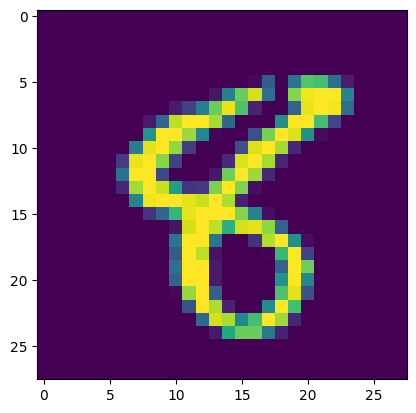

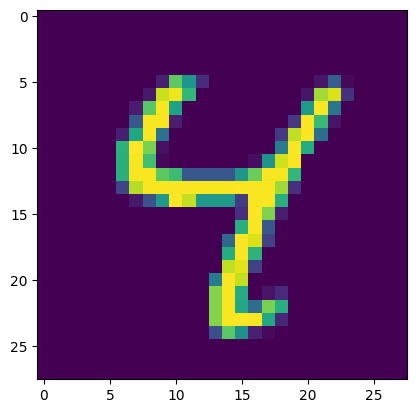

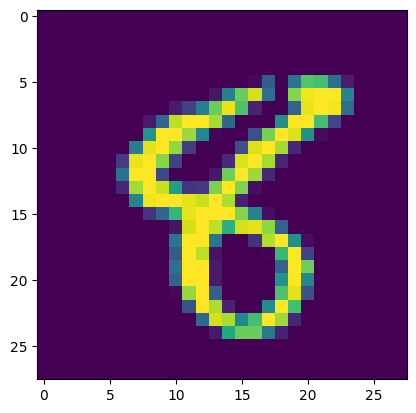

In [34]:
import numpy as np
import matplotlib.pyplot as plt 

file1='./t10k-images-idx3-ubyte'
file2='./t10k-labels-idx1-ubyte'

import idx2numpy

Images= idx2numpy.convert_from_file(file1)
labels= idx2numpy.convert_from_file(file2)

cl=[8,4]



id_1=np.where(labels==cl[0])
id1=id_1[0]

Im_1=Images[id1,:,:]
lab_1=labels[id1]


id_5=np.where(labels==cl[1])
id5=id_5[0]

Im_5=Images[id5,:,:]
lab_5=labels[id5]

plt.imshow(Im_1[1,:,:])
plt.figure()
plt.imshow(Im_5[1,:,:])



data=np.concatenate((Im_1,Im_5))
data=np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]))

G_lab=np.concatenate((lab_1,lab_5))

d=data[1,:]
im=np.reshape(d,(28,28))
plt.figure()
plt.imshow(im)


Use the K-means clustering algorithm from the last lab to form the clusters 

In [36]:

def K_means_clustering(data,K,itr,eps):

  idx=np.random.randint(0,data.shape[0],K)
  Cents=data[idx,:]


  DAL=np.zeros((data.shape[0],K+2))
  error=[]
  F=data+10**(-20)   
  


  for n in range(itr):

   for i in range(F.shape[0]):
      for j in range(K):
        DAL[i,j]=np.linalg.norm(F[i,:]-Cents[j,:])
        

      Dist=np.min(DAL[i,:K])
      
      ind=((np.where(Dist==DAL[i,:K])[0]))
      
      DAL[i,K]=ind.astype('int')
      DAL[i,K+1]=Dist


   for i in range(K):
      ind=np.where(DAL[:,K]==i)
      
      if (F[ind,:][0].shape[0])==0:
        id1=np.random.randint(0,data.shape[0],1)
        Cents[i,:]=F[id1,:]
      else:
        Cents[i,:]=np.mean(F[ind,:][0],axis=0)


      

   error.append(np.mean(DAL[:,K+1]))  
   



   if n>2:
      if abs(error[n]-error[n-1])<eps:
         break

   
  return DAL, Cents,error


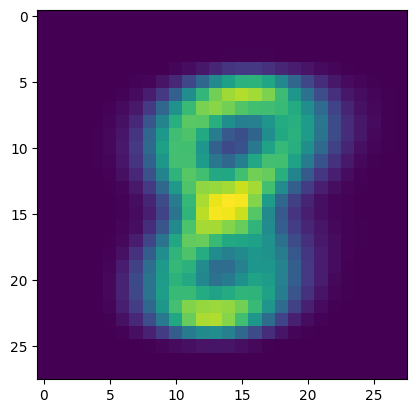

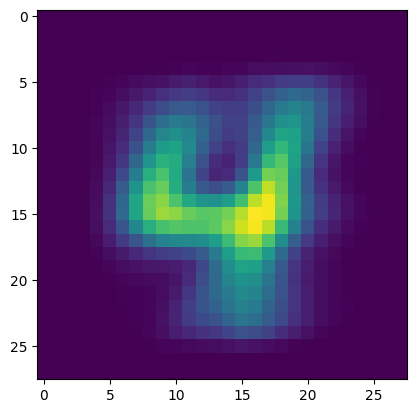

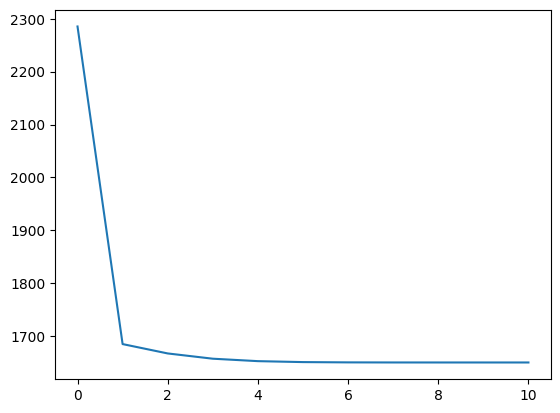

In [37]:
DAL,cents,error=K_means_clustering(data,2,200,10**(-20))

plt.imshow(np.reshape(cents[0,:],(28,28)))
plt.figure()
plt.imshow(np.reshape(cents[1,:],(28,28)))

plt.figure()
plt.plot(error)

In [38]:
from sklearn import metrics

pred_lab=DAL[:,2]
print(pred_lab)
print(lab)
print('performance=',metrics.homogeneity_score(pred_lab,G_lab))

[0. 0. 0. ... 1. 1. 1.]
[1. 2. 3. 4. 5.]
performance= 0.7923647584296725


In [40]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,n_init=100,max_iter=100)
kmeans.fit(data)

KMeans(max_iter=100, n_clusters=2, n_init=100)

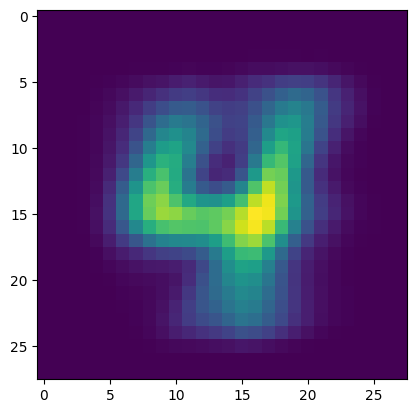

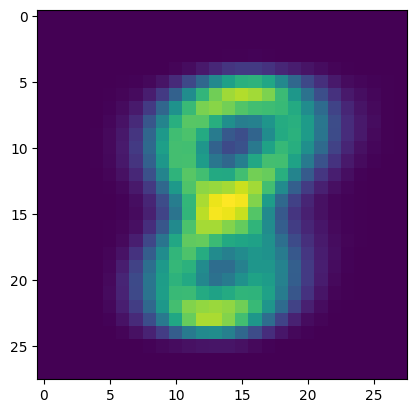

In [41]:
cents=kmeans.cluster_centers_
im=np.reshape(cents[0,:],(28,28))
plt.figure()
plt.imshow(im)

im=np.reshape(cents[1,:],(28,28))
plt.figure()
plt.imshow(im)

In [42]:
from sklearn import metrics

pred_lab=kmeans.predict(data)
print(pred_lab)
print(lab)
print('performance=',metrics.homogeneity_score(pred_lab,G_lab))

[1 1 1 ... 0 0 0]
[1. 2. 3. 4. 5.]
performance= 0.7925315874670981


In [45]:
from sklearn.mixture import GaussianMixture as Gmm
gmm=Gmm(n_components=2, init_params='kmeans',covariance_type='diag')

In [46]:
gmm.fit(data)

GaussianMixture(covariance_type='diag', n_components=2)

In [47]:
means=gmm.means_
vars=gmm.covariances_
weights=gmm.weights_

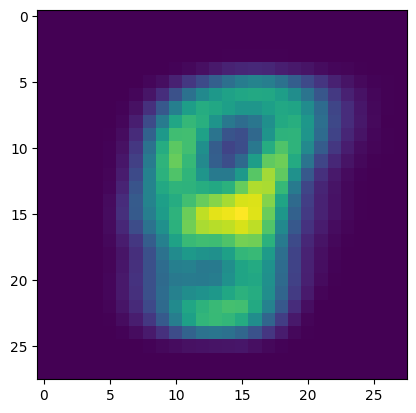

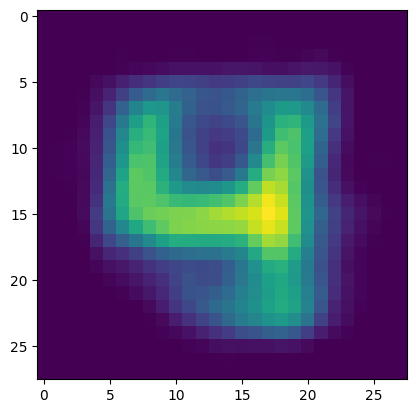

In [48]:
im=np.reshape(means[0,:],(28,28))
plt.figure()
plt.imshow(im)

im=np.reshape(means[1,:],(28,28))
plt.figure()
plt.imshow(im)

In [49]:
from sklearn import metrics

pred_lab=gmm.predict(data)
print(pred_lab)
print(lab)
print('performance=',metrics.homogeneity_score(pred_lab,G_lab))

[0 0 0 ... 0 0 0]
[1. 2. 3. 4. 5.]
performance= 0.051884827312455244
